## what is bag of words?
A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

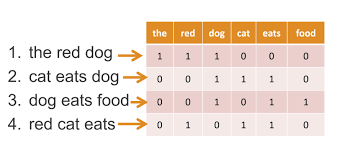

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

## Bag of words using PorterStemmer

In [3]:
# Create the stemmer object

stemmer = PorterStemmer()

# tokenize the paragraph
sentences = nltk.sent_tokenize(text=paragraph)

corpus = []

for i in range(len(sentences)):
    sentence = re.sub(pattern="[^a-zA-Z]",repl=" ", string=sentences[i])# remove the all punctuation mark
    sentence = sentence.lower() # make the sentence lower case
    words = sentence.split() # make the sentence into words
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words("english"))]
    words = " ".join(words)
    corpus.append(words)
print(corpus)

['three vision india', 'year histori peopl world come invad us captur land conquer mind', 'alexand onward greek turk mogul portugues british french dutch came loot us took', 'yet done nation', 'conquer anyon', 'grab land cultur histori tri enforc way life', '', 'respect freedom other first vision freedom', 'believ india got first vision start war independ', 'freedom must protect nurtur build', 'free one respect us', 'second vision india develop', 'fifti year develop nation', 'time see develop nation', 'among top nation world term gdp', 'percent growth rate area', 'poverti level fall', 'achiev global recognis today', 'yet lack self confid see develop nation self reliant self assur', 'incorrect', 'third vision', 'india must stand world', 'believ unless india stand world one respect us', 'strength respect strength', 'must strong militari power also econom power', 'must go hand hand', 'good fortun work three great mind', 'dr vikram sarabhai dept', 'space professor satish dhawan succeed dr 

In [4]:
# Creating the bag of words model
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [5]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
print(x.shape)
print(x.ndim)

(31, 113)
2


## Bag of words using Lemmatization

In [7]:
# Create the lemmetizer object

lemmetizer = WordNetLemmatizer()

# tokenize the paragraph
sentences = nltk.sent_tokenize(text=paragraph)

corpus2 = []

for i in range(len(sentences)):
    sentence = re.sub(pattern="[^a-zA-Z]",repl=" ", string=sentences[i])# remove the all punctuation mark
    sentence = sentence.lower() # make the sentence lower case
    words = sentence.split() # make the sentence into words
    words = [lemmetizer.lemmatize(word) for word in words if word not in set(stopwords.words("english"))]
    words = " ".join(words)
    corpus2.append(words)
print(corpus2)

['three vision india', 'year history people world come invaded u captured land conquered mind', 'alexander onwards greek turk mogul portuguese british french dutch came looted u took', 'yet done nation', 'conquered anyone', 'grabbed land culture history tried enforce way life', '', 'respect freedom others first vision freedom', 'believe india got first vision started war independence', 'freedom must protect nurture build', 'free one respect u', 'second vision india development', 'fifty year developing nation', 'time see developed nation', 'among top nation world term gdp', 'percent growth rate area', 'poverty level falling', 'achievement globally recognised today', 'yet lack self confidence see developed nation self reliant self assured', 'incorrect', 'third vision', 'india must stand world', 'believe unless india stand world one respect u', 'strength respect strength', 'must strong military power also economic power', 'must go hand hand', 'good fortune worked three great mind', 'dr vi

In [8]:
# Creating the bag of words model

cv2 = CountVectorizer()
y = cv2.fit_transform(corpus2).toarray()

In [9]:
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
print(y.shape)
print(y.ndim)

(31, 114)
2
